In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bs4 as bs 
import requests

In [ ]:
df = pd.read_csv('SC_Collisions.csv')
population = pd.read_excel('Population.xlsx')
df.head(10)

/Users/cynthiaji/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,8167072,2018,1/9/19,4313,2/5/18,1625,3876,WESTE,1,5,...,0,0,-,-,37.182720,-121.494476,SANTA CLARA,SAN JOSE,-121.829147,37.307529
1,8167263,2018,5/26/20,4313,4/8/18,1550,4259,DY,7,5,...,0,0,-,-,NaN,NaN,SANTA CLARA,SAN JOSE,-121.825081,37.251331
2,8167638,2019,1/8/20,4316,9/4/19,1722,18656,25,3,5,...,0,0,-,SF,NaN,NaN,SANTA CLARA,SUNNYVALE,-121.997627,37.391582
3,8167686,2019,1/8/20,4312,9/6/19,1715,6911,NaN,5,5,...,0,0,-,-,NaN,NaN,SANTA CLARA,PALO ALTO,-122.132805,37.418152
4,8167735,2019,10/9/19,4314,9/9/19,1301,P7447,43471,1,5,...,0,0,-,-,37.392761,-121.947052,SANTA CLARA,SANTA CLARA,-121.947067,37.392899
5,8167768,2019,3/4/20,4313,8/25/19,1405,4634,ADAM,7,5,...,0,1,-,FR,37.151421,-121.523178,SANTA CLARA,SAN JOSE,-121.872543,37.256138
6,8167812,2019,10/23/19,4314,8/26/19,2201,D4241,43471,1,5,...,0,0,-,-,37.345551,-121.995552,SANTA CLARA,SANTA CLARA,-121.995903,37.345409
7,8167854,2019,1/8/20,4313,9/10/19,1842,4681,MARY,2,5,...,0,0,-,FR,37.211990,-121.502037,SANTA CLARA,SAN JOSE,-121.838081,37.353729
8,8167865,2019,1/29/20,4304,9/10/19,2111,D7084,4304,2,5,...,0,0,-,-,NaN,NaN,SANTA CLARA,GILROY,-121.596855,37.013573
9,8167877,2019,1/29/20,4314,9/2/19,521,G8022,43471,1,5,...,0,0,-,-,37.352531,-121.970093,SANTA CLARA,SANTA CLARA,-121.970367,37.352444


In [ ]:
df.columns

Index(['CASE_ID', 'ACCIDENT_YEAR', 'PROC_DATE', 'JURIS', 'COLLISION_DATE',
       'COLLISION_TIME', 'OFFICER_ID', 'REPORTING_DISTRICT', 'DAY_OF_WEEK',
       'CHP_SHIFT', 'POPULATION', 'CNTY_CITY_LOC', 'SPECIAL_COND', 'BEAT_TYPE',
       'CHP_BEAT_TYPE', 'CITY_DIVISION_LAPD', 'CHP_BEAT_CLASS', 'BEAT_NUMBER',
       'PRIMARY_RD', 'SECONDARY_RD', 'DISTANCE', 'DIRECTION', 'INTERSECTION',
       'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'CALTRANS_COUNTY',
       'CALTRANS_DISTRICT', 'STATE_ROUTE', 'ROUTE_SUFFIX', 'POSTMILE_PREFIX',
       'POSTMILE', 'LOCATION_TYPE', 'RAMP_INTERSECTION', 'SIDE_OF_HWY',
       'TOW_AWAY', 'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED',
       'PARTY_COUNT', 'PRIMARY_COLL_FACTOR', 'PCF_CODE_OF_VIOL',
       'PCF_VIOL_CATEGORY', 'PCF_VIOLATION', 'PCF_VIOL_SUBSECTION',
       'HIT_AND_RUN', 'TYPE_OF_COLLISION', 'MVIW', 'PED_ACTION',
       'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING',
       'CONTROL_DEVICE', 'CHP_ROAD_TYPE', 'PEDESTRIAN_

In [ ]:
df1 = df[df['PEDESTRIAN_ACCIDENT'] == 'Y']
df1.drop(['CASE_ID','OFFICER_ID','JURIS','REPORTING_DISTRICT','PROC_DATE','DAY_OF_WEEK','CNTY_CITY_LOC','WEATHER_1','CALTRANS_COUNTY',
       'CALTRANS_DISTRICT', 'WEATHER_2','BEAT_NUMBER','POSTMILE','PRIMARY_COLL_FACTOR', 'PCF_CODE_OF_VIOL',
       'PCF_VIOL_CATEGORY', 'PCF_VIOLATION', 'PCF_VIOL_SUBSECTION', 'LOCATION_TYPE','HIT_AND_RUN', 'TYPE_OF_COLLISION', 'MVIW', 'PED_ACTION',
       'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING',
       'CONTROL_DEVICE', 'CHP_ROAD_TYPE', 'RAMP_INTERSECTION','CHP_SHIFT','SPECIAL_COND','BEAT_TYPE','CHP_BEAT_TYPE','CITY_DIVISION_LAPD','CHP_BEAT_CLASS','BICYCLE_ACCIDENT', 'MOTORCYCLE_ACCIDENT','PRIMARY_RAMP', 'SECONDARY_RAMP', 'TRUCK_ACCIDENT','COUNTY'], inplace = True, axis = 1)
df1

/Users/cynthiaji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ACCIDENT_YEAR,COLLISION_DATE,COLLISION_TIME,POPULATION,PRIMARY_RD,SECONDARY_RD,DISTANCE,DIRECTION,INTERSECTION,STATE_HWY_IND,...,COUNT_PED_INJURED,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED,COUNT_MC_KILLED,COUNT_MC_INJURED,LATITUDE,LONGITUDE,CITY,POINT_X,POINT_Y
0,2018,2/5/18,1625,7,MCLAUGHLIN AV,BELLINGHAM DR,0.0,NaN,Y,N,...,0,0,0,0,0,37.182720,-121.494476,SAN JOSE,-121.829147,37.307529
19,2018,4/27/18,1530,6,EL CAMINO REAL,GRAPE AV,380.0,W,N,Y,...,0,0,0,0,0,37.372849,-122.052811,SUNNYVALE,-122.054047,37.373302
22,2018,3/1/18,2315,6,EL CAMINO REAL,MARIA LN,0.0,NaN,Y,Y,...,0,0,0,0,0,37.355911,-122.017967,SUNNYVALE,-122.017776,37.355934
26,2018,5/29/18,2047,7,N 11TH ST,E SANTA CLARA ST,0.0,NaN,N,N,...,0,0,0,0,0,37.202831,-121.524780,SAN JOSE,-121.880013,37.341209
31,2018,10/19/18,1848,7,CURTNER AV,BRIARWOOD DR,0.0,NaN,Y,N,...,0,0,0,0,0,NaN,NaN,SAN JOSE,-121.908112,37.282162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14878,2019,11/4/19,1047,7,DI SALVO AV,FOREST AV,0.0,NaN,Y,N,...,1,0,0,0,0,NaN,NaN,SAN JOSE,-121.937111,37.327049
14940,2019,12/31/19,2215,5,US-101 N/B,ELLIS ST,1056.0,N,N,Y,...,1,0,0,0,0,37.405750,-122.057068,MOUNTAIN VIEW,-122.057075,37.405731
14949,2019,7/28/19,335,7,SR-237 E/B,N FIRST STREET,520.0,E,N,Y,...,0,0,0,0,0,37.419300,-121.954102,SAN JOSE,-121.954102,37.419369
14954,2019,9/7/19,2346,9,INTERSTATE 680 NORTHBOUND,ALUM ROCK AVENUE,435.0,N,N,Y,...,0,0,0,0,0,37.360989,-121.841629,UNINCORPORATED,-121.841606,37.360867


In [ ]:
df1 = df1.drop(df1[df1['INTERSECTION'] == '-'].index )

<function matplotlib.pyplot.show(*args, **kw)>

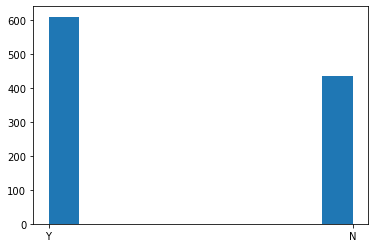

In [ ]:
plt.hist(df1['INTERSECTION'], bins = 10)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

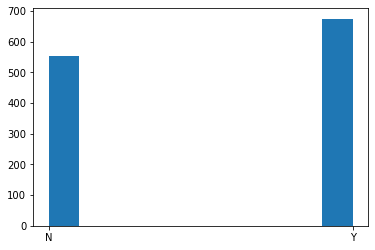

In [ ]:
df2 = df[df['BICYCLE_ACCIDENT'] == 'Y']
df2 = df2.drop(df2[df2['INTERSECTION'] == '-'].index )
plt.hist(df2['INTERSECTION'], bins = 10)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

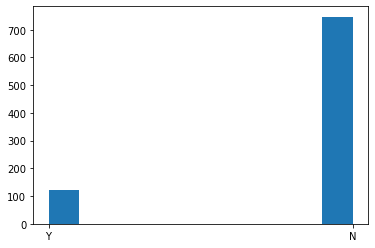

In [ ]:
df3 = df[df['MOTORCYCLE_ACCIDENT'] == 'Y']
df3 = df3.drop(df3[df3['INTERSECTION'] == '-'].index )
plt.hist(df3['INTERSECTION'], bins = 10)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

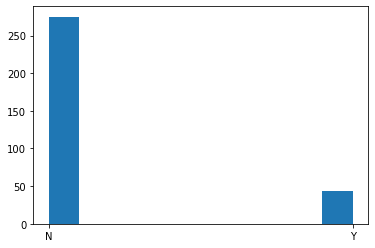

In [ ]:
df4 = df[df['TRUCK_ACCIDENT'] == 'Y']
df4 = df4.drop(df4[df4['INTERSECTION'] == '-'].index )
plt.hist(df4['INTERSECTION'], bins = 10)
plt.show

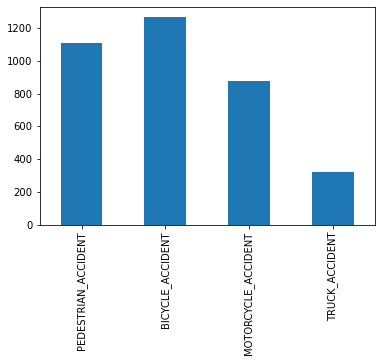

In [ ]:
dfp = df[df['PEDESTRIAN_ACCIDENT'] == 'Y']
index1 = len(dfp.index)
dfb = df[df['BICYCLE_ACCIDENT'] == 'Y']
index2 = len(dfb.index)
dfm = df[df['MOTORCYCLE_ACCIDENT'] == 'Y']
index3 = len(dfm.index)
dft = df[df['TRUCK_ACCIDENT'] == 'Y']
index4 = len(dft.index)
df_count = pd.DataFrame(data = {'PEDESTRIAN_ACCIDENT': [index1], 'BICYCLE_ACCIDENT':[index2], 'MOTORCYCLE_ACCIDENT':[index3],'TRUCK_ACCIDENT':[index4]})
df_count.sum().plot(kind='bar')

In [ ]:
df_w = df[(df['WEATHER_1'] == 'C') | (df['WEATHER_1'] == 'D') | (df['WEATHER_1'] == 'E') | (df['WEATHER_1'] == 'G')]
df_w

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
22,8404806,2018,6/27/18,4316,3/1/18,2315,10087,42,4,5,...,0,0,-,-,37.355911,-122.017967,SANTA CLARA,SUNNYVALE,-122.017776,37.355934
24,8465551,2018,1/25/19,4313,3/2/18,754,4564,SOUTH,5,5,...,0,0,-,-,NaN,NaN,SANTA CLARA,SAN JOSE,-121.872917,37.222141
54,8465862,2019,6/20/19,4302,2/26/19,1813,G6634,4302,2,5,...,0,0,-,-,NaN,NaN,SANTA CLARA,CAMPBELL,-121.957161,37.279850
67,8504270,2018,7/31/18,4316,1/8/18,2229,11770,32,1,5,...,0,0,-,-,37.371780,-122.048470,SANTA CLARA,SUNNYVALE,-122.050621,37.372368
76,8504736,2018,7/6/18,4313,1/9/18,1349,3847,DX,2,5,...,0,0,-,-,34.160709,-119.162353,SANTA CLARA,SAN JOSE,-121.821876,37.267571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14912,91159521,2019,1/6/20,9340,12/22/19,1300,22227,NaN,7,1,...,0,0,-,-,37.148602,-121.987396,SANTA CLARA,UNINCORPORATED,-121.987335,37.148537
14922,91159966,2019,1/6/20,9340,12/22/19,605,22227,NaN,7,1,...,0,0,-,-,37.146900,-121.987396,SANTA CLARA,UNINCORPORATED,-121.987473,37.146832
14924,91160212,2019,1/6/20,9340,12/22/19,1253,22217,NaN,7,1,...,0,0,-,-,37.332642,-121.896767,SANTA CLARA,SAN JOSE,-121.896927,37.332611
14929,91160631,2019,1/7/20,9340,12/22/19,740,22205,NaN,7,1,...,0,0,-,-,37.367161,-121.845489,SANTA CLARA,SAN JOSE,-121.845467,37.367172


In [ ]:
df_w['CITY'].value_counts()

SAN JOSE           354
UNINCORPORATED     127
SUNNYVALE           46
MILPITAS            40
GILROY              36
PALO ALTO           35
MOUNTAIN VIEW       32
SANTA CLARA         24
LOS GATOS           21
CAMPBELL            14
CUPERTINO            8
LOS ALTOS            7
MORGAN HILL          6
SARATOGA             4
LOS ALTOS HILLS      3
Name: CITY, dtype: int64

In [ ]:
df_w2 = df_w[df_w.CITY !='UNINCORPORATED']

In [ ]:
df_w2['CITY'].value_counts()

SAN JOSE           354
SUNNYVALE           46
MILPITAS            40
GILROY              36
PALO ALTO           35
MOUNTAIN VIEW       32
SANTA CLARA         24
LOS GATOS           21
CAMPBELL            14
CUPERTINO            8
LOS ALTOS            7
MORGAN HILL          6
SARATOGA             4
LOS ALTOS HILLS      3
Name: CITY, dtype: int64

In [ ]:
df_t = pd.read_csv('2349981.csv')
df_t.head(10)

,STATION,NAME,DATE,TAVG
0,US1CASC0052,"SAN JOSE 1.9 SW, CA US",2018-01-01,NaN
1,US1CASC0052,"SAN JOSE 1.9 SW, CA US",2018-01-02,NaN
2,US1CASC0052,"SAN JOSE 1.9 SW, CA US",2018-01-03,NaN
3,US1CASC0052,"SAN JOSE 1.9 SW, CA US",2018-01-04,NaN
4,US1CASC0052,"SAN JOSE 1.9 SW, CA US",2018-01-05,NaN
5,US1CASC0052,"SAN JOSE 1.9 SW, CA US",2018-01-06,NaN
6,US1CASC0052,"SAN JOSE 1.9 SW, CA US",2018-01-07,NaN
7,US1CASC0052,"SAN JOSE 1.9 SW, CA US",2018-01-08,NaN
8,US1CASC0052,"SAN JOSE 1.9 SW, CA US",2018-01-09,NaN
9,US1CASC0052,"SAN JOSE 1.9 SW, CA US",2018-01-10,NaN


In [ ]:
df_t2 = df_t.dropna()
df_t2

,STATION,NAME,DATE,TAVG
9423,USR0000CLGA,"LOS GATOS CALIFORNIA, CA US",2018-01-01,52.0
9424,USR0000CLGA,"LOS GATOS CALIFORNIA, CA US",2018-01-02,60.0
9425,USR0000CLGA,"LOS GATOS CALIFORNIA, CA US",2018-01-03,58.0
9426,USR0000CLGA,"LOS GATOS CALIFORNIA, CA US",2018-01-04,55.0
9427,USR0000CLGA,"LOS GATOS CALIFORNIA, CA US",2018-01-05,54.0
...,...,...,...,...
18897,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2020-11-04,62.0
18898,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2020-11-05,67.0
18899,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2020-11-06,55.0
18900,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2020-11-07,51.0


In [ ]:
df_t2['NAME'].value_counts()

POVERTY CALIFORNIA, CA US      1043
LOS ALTOS CALIFORNIA, CA US    1043
LOS GATOS CALIFORNIA, CA US    1043
Name: NAME, dtype: int64

In [ ]:
df_t3 = df_t2[df_t2['NAME'] == 'LOS ALTOS CALIFORNIA, CA US']
df_t3

,STATION,NAME,DATE,TAVG
17859,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2018-01-01,52.0
17860,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2018-01-02,53.0
17861,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2018-01-03,52.0
17862,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2018-01-04,58.0
17863,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2018-01-05,58.0
...,...,...,...,...
18897,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2020-11-04,62.0
18898,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2020-11-05,67.0
18899,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2020-11-06,55.0
18900,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2020-11-07,51.0


In [ ]:
df_t3['DATE'] = pd.to_datetime(df_t3.DATE)
df_t3

<ipython-input-57-1b09ef96ef4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t3['DATE'] = pd.to_datetime(df_t3.DATE)


,STATION,NAME,DATE,TAVG
17859,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2018-01-01,52.0
17860,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2018-01-02,53.0
17861,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2018-01-03,52.0
17862,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2018-01-04,58.0
17863,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2018-01-05,58.0
...,...,...,...,...
18897,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2020-11-04,62.0
18898,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2020-11-05,67.0
18899,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2020-11-06,55.0
18900,USR0000CALT,"LOS ALTOS CALIFORNIA, CA US",2020-11-07,51.0


In [ ]:
df_w2['COLLISION_DATE'] = pd.to_datetime(df_w2.COLLISION_DATE)
df_w2 = df_w2.rename(columns = {'COLLISION_DATE':'DATE'})
df_w2

<ipython-input-58-dc9a36a5482f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w2['COLLISION_DATE'] = pd.to_datetime(df_w2.COLLISION_DATE)


,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
22,8404806,2018,6/27/18,4316,2018-03-01,2315,10087,42,4,5,...,0,0,-,-,37.355911,-122.017967,SANTA CLARA,SUNNYVALE,-122.017776,37.355934
24,8465551,2018,1/25/19,4313,2018-03-02,754,4564,SOUTH,5,5,...,0,0,-,-,NaN,NaN,SANTA CLARA,SAN JOSE,-121.872917,37.222141
54,8465862,2019,6/20/19,4302,2019-02-26,1813,G6634,4302,2,5,...,0,0,-,-,NaN,NaN,SANTA CLARA,CAMPBELL,-121.957161,37.279850
67,8504270,2018,7/31/18,4316,2018-01-08,2229,11770,32,1,5,...,0,0,-,-,37.371780,-122.048470,SANTA CLARA,SUNNYVALE,-122.050621,37.372368
76,8504736,2018,7/6/18,4313,2018-01-09,1349,3847,DX,2,5,...,0,0,-,-,34.160709,-119.162353,SANTA CLARA,SAN JOSE,-121.821876,37.267571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847,91153801,2019,12/27/19,9340,2019-12-18,750,22011,NaN,3,1,...,0,0,-,-,37.251801,-121.840042,SANTA CLARA,SAN JOSE,-121.840042,37.251801
14848,91153828,2019,12/27/19,9340,2019-12-18,1710,22447,NaN,3,2,...,0,0,-,-,37.252491,-121.958076,SANTA CLARA,LOS GATOS,-121.958054,37.252476
14906,91159375,2019,1/6/20,9340,2019-12-25,15,22334,NaN,3,3,...,0,0,-,-,37.377392,-121.855499,SANTA CLARA,SAN JOSE,-121.855484,37.377411
14924,91160212,2019,1/6/20,9340,2019-12-22,1253,22217,NaN,7,1,...,0,0,-,-,37.332642,-121.896767,SANTA CLARA,SAN JOSE,-121.896927,37.332611


In [ ]:
df_w2['TAVG'] = df_w2['DATE'].map(df_t3.set_index('DATE')['TAVG'])
df_w2

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y,TAVG
22,8404806,2018,6/27/18,4316,2018-03-01,2315,10087,42,4,5,...,0,-,-,37.355911,-122.017967,SANTA CLARA,SUNNYVALE,-122.017776,37.355934,51.0
24,8465551,2018,1/25/19,4313,2018-03-02,754,4564,SOUTH,5,5,...,0,-,-,NaN,NaN,SANTA CLARA,SAN JOSE,-121.872917,37.222141,45.0
54,8465862,2019,6/20/19,4302,2019-02-26,1813,G6634,4302,2,5,...,0,-,-,NaN,NaN,SANTA CLARA,CAMPBELL,-121.957161,37.279850,54.0
67,8504270,2018,7/31/18,4316,2018-01-08,2229,11770,32,1,5,...,0,-,-,37.371780,-122.048470,SANTA CLARA,SUNNYVALE,-122.050621,37.372368,53.0
76,8504736,2018,7/6/18,4313,2018-01-09,1349,3847,DX,2,5,...,0,-,-,34.160709,-119.162353,SANTA CLARA,SAN JOSE,-121.821876,37.267571,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847,91153801,2019,12/27/19,9340,2019-12-18,750,22011,NaN,3,1,...,0,-,-,37.251801,-121.840042,SANTA CLARA,SAN JOSE,-121.840042,37.251801,50.0
14848,91153828,2019,12/27/19,9340,2019-12-18,1710,22447,NaN,3,2,...,0,-,-,37.252491,-121.958076,SANTA CLARA,LOS GATOS,-121.958054,37.252476,50.0
14906,91159375,2019,1/6/20,9340,2019-12-25,15,22334,NaN,3,3,...,0,-,-,37.377392,-121.855499,SANTA CLARA,SAN JOSE,-121.855484,37.377411,47.0
14924,91160212,2019,1/6/20,9340,2019-12-22,1253,22217,NaN,7,1,...,0,-,-,37.332642,-121.896767,SANTA CLARA,SAN JOSE,-121.896927,37.332611,49.0


In [ ]:
df_w2['RAINING']= 0
df_w2['SNOWING'] = 0
df_w2['FOG'] =0
df_w2['WIND'] = 0
df_w2.loc[df_w2['WEATHER_1'] == 'C', 'RAINING'] = 1
df_w2.loc[df_w2['WEATHER_1'] == 'D', 'SNOWING'] = 1
df_w2.loc[df_w2['WEATHER_1'] == 'E', 'FOG'] = 1
df_w2.loc[df_w2['WEATHER_1'] == 'G', 'WIND'] = 1
df_done = df_w2[['DATE','CITY', 'WEATHER_1', 'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED','TAVG', 'RAINING', 'SNOWING','FOG','WIND']]
df_done

,DATE,CITY,WEATHER_1,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,TAVG,RAINING,SNOWING,FOG,WIND
22,2018-03-01,SUNNYVALE,C,1,1,0,51.0,1,0,0,0
24,2018-03-02,SAN JOSE,C,1,1,0,45.0,1,0,0,0
54,2019-02-26,CAMPBELL,C,1,1,0,54.0,1,0,0,0
67,2018-01-08,SUNNYVALE,C,4,0,1,53.0,1,0,0,0
76,2018-01-09,SAN JOSE,C,4,0,1,54.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14847,2019-12-18,SAN JOSE,C,4,0,1,50.0,1,0,0,0
14848,2019-12-18,LOS GATOS,C,4,0,1,50.0,1,0,0,0
14906,2019-12-25,SAN JOSE,C,4,0,2,47.0,1,0,0,0
14924,2019-12-22,SAN JOSE,C,3,0,1,49.0,1,0,0,0


In [ ]:
df_done.corr()

,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,TAVG,RAINING,SNOWING,FOG,WIND
COLLISION_SEVERITY,1.000000,-0.524909,-0.016415,0.088601,0.080949,0.025093,-0.086072,-0.032814
NUMBER_KILLED,-0.524909,1.000000,-0.056430,-0.032249,0.019623,-0.005615,-0.017884,-0.005615
NUMBER_INJURED,-0.016415,-0.056430,1.000000,-0.008767,-0.089129,-0.015978,0.107657,-0.015978
TAVG,0.088601,-0.032249,-0.008767,1.000000,-0.071930,0.025994,0.070975,-0.001841
RAINING,0.080949,0.019623,-0.089129,-0.071930,1.000000,-0.286140,-0.911397,-0.286140
SNOWING,0.025093,-0.005615,-0.015978,0.025994,-0.286140,1.000000,-0.005064,-0.001590
FOG,-0.086072,-0.017884,0.107657,0.070975,-0.911397,-0.005064,1.000000,-0.005064
WIND,-0.032814,-0.005615,-0.015978,-0.001841,-0.286140,-0.001590,-0.005064,1.000000


In [ ]:
df_done['CITY']

22       SUNNYVALE
24        SAN JOSE
54        CAMPBELL
67       SUNNYVALE
76        SAN JOSE
           ...    
14847     SAN JOSE
14848    LOS GATOS
14906     SAN JOSE
14924     SAN JOSE
14929     SAN JOSE
Name: CITY, Length: 630, dtype: object

In [ ]:
thisdict = {
    "SAN JOSE": 1030000000,
    "SUNNYVALE" : 153185,
    "MILPITAS": 80430,
    "GILROY": 58756,
    "PALO ALTO": 66666,
    "MOUNTAIN VIEW": 83377,
    "SANTA CLARA": 28488,  
    "LOS GATOS": 30680,
    "CAMPBELL": 42466,
    "CUPERTINO": 60170,
    "LOS ALTOS": 30531,
    "MORGAN HILL": 45135,
    "SARATOGA": 30599,
    "LOS ALTOS HILLS": 8559
}

In [ ]:
df_done['CITY']

22       SUNNYVALE
24        SAN JOSE
54        CAMPBELL
67       SUNNYVALE
76        SAN JOSE
           ...    
14847     SAN JOSE
14848    LOS GATOS
14906     SAN JOSE
14924     SAN JOSE
14929     SAN JOSE
Name: CITY, Length: 630, dtype: object

In [ ]:
df_done['Population'] = df_done['CITY'].map(thisdict) 

<ipython-input-65-dc5f940a199a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_done['Population'] = df_done['CITY'].map(thisdict)


In [ ]:
df_done

,DATE,CITY,WEATHER_1,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,TAVG,RAINING,SNOWING,FOG,WIND,Population
22,2018-03-01,SUNNYVALE,C,1,1,0,51.0,1,0,0,0,153185
24,2018-03-02,SAN JOSE,C,1,1,0,45.0,1,0,0,0,1030000000
54,2019-02-26,CAMPBELL,C,1,1,0,54.0,1,0,0,0,42466
67,2018-01-08,SUNNYVALE,C,4,0,1,53.0,1,0,0,0,153185
76,2018-01-09,SAN JOSE,C,4,0,1,54.0,1,0,0,0,1030000000
...,...,...,...,...,...,...,...,...,...,...,...,...
14847,2019-12-18,SAN JOSE,C,4,0,1,50.0,1,0,0,0,1030000000
14848,2019-12-18,LOS GATOS,C,4,0,1,50.0,1,0,0,0,30680
14906,2019-12-25,SAN JOSE,C,4,0,2,47.0,1,0,0,0,1030000000
14924,2019-12-22,SAN JOSE,C,3,0,1,49.0,1,0,0,0,1030000000


In [ ]:
df_done['predictor'] = df_done['Population'] / 10000000 * 0.02 + df_done['TAVG'] * 0.095 + df_done['RAINING'] * 0.34 + df_done['SNOWING'] * 0.50 + df_done['FOG'] * 0.20 + df_done['WIND'] * 0.16
#using statistics- a system with other vechiles and other road users- user weather as a parameter; quantification
#foralerts. Alert system that has a number of parameters- weather can be one of these. 

<ipython-input-145-b23d63b58ecd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_done['predictor'] = df_done['Population'] / 10000000 * 0.02 + df_done['TAVG'] * 0.095 + df_done['RAINING'] * 0.34 + df_done['SNOWING'] * 0.50 + df_done['FOG'] * 0.20 + df_done['WIND'] * 0.16


In [ ]:
df_done

,DATE,CITY,WEATHER_1,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,TAVG,RAINING,SNOWING,FOG,WIND,Population,predictor,n_TAVG,n_RAINING,n_SNOWING,n_FOG,n_WIND,n_Population,n_predictor
22,2018-03-01,SUNNYVALE,C,1,1,0,51.0,1,0,0,0,153185,5.491370,-0.278874,0.139347,-0.039873,-0.127,-0.039873,-1.132368,-1.154290
24,2018-03-02,SAN JOSE,C,1,1,0,45.0,1,0,0,0,1030000000,2064.615000,-1.675092,0.139347,-0.039873,-0.127,-0.039873,0.882984,0.200875
54,2019-02-26,CAMPBELL,C,1,1,0,54.0,1,0,0,0,42466,5.554932,0.419235,0.139347,-0.039873,-0.127,-0.039873,-1.132585,-0.895229
67,2018-01-08,SUNNYVALE,C,4,0,1,53.0,1,0,0,0,153185,5.681370,0.186532,0.139347,-0.039873,-0.127,-0.039873,-1.132368,-0.981448
76,2018-01-09,SAN JOSE,C,4,0,1,54.0,1,0,0,0,1030000000,2065.470000,0.419235,0.139347,-0.039873,-0.127,-0.039873,0.882984,0.978663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847,2019-12-18,SAN JOSE,C,4,0,1,50.0,1,0,0,0,1030000000,2065.090000,-0.511577,0.139347,-0.039873,-0.127,-0.039873,0.882984,0.632980
14848,2019-12-18,LOS GATOS,C,4,0,1,50.0,1,0,0,0,30680,5.151360,-0.511577,0.139347,-0.039873,-0.127,-0.039873,-1.132608,-1.240934
14906,2019-12-25,SAN JOSE,C,4,0,2,47.0,1,0,0,0,1030000000,2064.805000,-1.209686,0.139347,-0.039873,-0.127,-0.039873,0.882984,0.373717
14924,2019-12-22,SAN JOSE,C,3,0,1,49.0,1,0,0,0,1030000000,2064.995000,-0.744280,0.139347,-0.039873,-0.127,-0.039873,0.882984,0.546559


In [ ]:
df_done.corr()

,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,TAVG,RAINING,SNOWING,FOG,WIND,Population,predictor,n_TAVG,n_RAINING,n_SNOWING,n_FOG,n_WIND,n_Population,n_predictor
COLLISION_SEVERITY,1.000000,-0.524909,-0.016415,0.088601,0.080949,0.025093,-0.086072,-0.032814,0.001858,0.001895,0.088601,0.080949,0.025093,-0.086072,-0.032814,0.001858,0.036361
NUMBER_KILLED,-0.524909,1.000000,-0.056430,-0.032249,0.019623,-0.005615,-0.017884,-0.005615,0.063523,0.063511,-0.032249,0.019623,-0.005615,-0.017884,-0.005615,0.063523,0.047370
NUMBER_INJURED,-0.016415,-0.056430,1.000000,-0.008767,-0.089129,-0.015978,0.107657,-0.015978,0.056505,0.056500,-0.008767,-0.089129,-0.015978,0.107657,-0.015978,0.056505,0.047575
TAVG,0.088601,-0.032249,-0.008767,1.000000,-0.071930,0.025994,0.070975,-0.001841,-0.002409,-0.002011,1.000000,-0.071930,0.025994,0.070975,-0.001841,-0.002409,0.368172
RAINING,0.080949,0.019623,-0.089129,-0.071930,1.000000,-0.286140,-0.911397,-0.286140,0.017388,0.017375,-0.071930,1.000000,-0.286140,-0.911397,-0.286140,0.017388,0.004167
SNOWING,0.025093,-0.005615,-0.015978,0.025994,-0.286140,1.000000,-0.005064,-0.001590,-0.045157,-0.045141,0.025994,-0.286140,1.000000,-0.005064,-0.001590,-0.045157,-0.026444
FOG,-0.086072,-0.017884,0.107657,0.070975,-0.911397,-0.005064,1.000000,-0.005064,0.009750,0.009761,0.070975,-0.911397,-0.005064,1.000000,-0.005064,0.009750,0.019509
WIND,-0.032814,-0.005615,-0.015978,-0.001841,-0.286140,-0.001590,-0.005064,1.000000,-0.045157,-0.045165,-0.001841,-0.286140,-0.001590,-0.005064,1.000000,-0.045157,-0.049114
Population,0.001858,0.063523,0.056505,-0.002409,0.017388,-0.045157,0.009750,-0.045157,1.000000,1.000000,-0.002409,0.017388,-0.045157,0.009750,-0.045157,1.000000,0.928692
predictor,0.001895,0.063511,0.056500,-0.002011,0.017375,-0.045141,0.009761,-0.045165,1.000000,1.000000,-0.002011,0.017375,-0.045141,0.009761,-0.045165,1.000000,0.928839


In [ ]:
def normalize(x):
    return (x- np.mean(x)) / np.std(x)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve

In [ ]:
df_done['NUMBER_INJURED'].astype(int)
type(df_done['NUMBER_INJURED'])

pandas.core.series.Series

In [ ]:
performance_features = ['TAVG','RAINING','SNOWING','FOG','WIND','Population','predictor']
for feature in performance_features :
    df_done['n_' + feature] = normalize(df_done[feature])
y_score = np.array(df_done['NUMBER_INJURED'])
Y_test = np.array(df_done['predictor'])
average_precision = average_precision_score(Y_test, y_score)
Recall = recall_score(Y_test, y_score
                     )
print('Precision rate: ' + str(average_precision))
print('Recall rate: ' + str(Recall))

<ipython-input-80-a081557e7d3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_done['n_' + feature] = normalize(df_done[feature])


ValueError: continuous format is not supported

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
position_train, position_test = train_test_split(df_done, test_size=0.3, random_state=100)
X_train = position_train[['TAVG','RAINING','SNOWING','FOG','WIND','Population']]
X_test = position_test[['TAVG','RAINING','SNOWING','FOG','WIND','Population']]
Y_train = position_train['predictor']
Y_test = position_test['predictor']
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, Y_train)
print(svr.score(X_train, Y_train))
print(svr.score(X_test, Y_test))

0.8496070707175203
0.876681600673543


In [ ]:
import pandas as pd
vechicle_2019 = pd.read_excel('vechicle_2019.xlsx', index_col=0) 
data = pd.read_excel('data.xlsx', index_col=0) 

KeyboardInterrupt: 

In [ ]:
data

In [ ]:
accidents = data.copy()
accidents = accidents[accidents['mode'] == 'All modes']
accidents = accidents.drop(columns=['UL95CI_avmtrate', 'avmtrate_se', 'avmtrate_rse', 'CA_decile_avmt',
       'CA_RR_avmtrate', 'groupquarters', 'version', 'LL95CI_avmtrate', 'avmttotal','ind_definition', 'county_fips', 'region_code','poprate', 'LL95CI_poprate',
       'UL95CI_poprate', 'poprate_se', 'poprate_rse', 'CA_decile_pop',
       'CA_RR_poprate', 'avmtrate'])
accidents['severe_rate in %'] = accidents['injuries']/accidents['totalpop']*100
accidents

,reportyear,geotype,geotypevalue,geoname,county_name,region_name,mode,severity,injuries,totalpop,severe_rate in %
ind_id,,,,,,,,,,,
753,2002,CO,6059.0,Orange,Orange,Southern California,All modes,Killed,193.0,2914663.0,0.006622
753,2002,CO,6059.0,Orange,Orange,Southern California,All modes,Severe Injury,721.0,2914663.0,0.024737
753,2002,CO,6061.0,Placer,Placer,Sacramento Area,All modes,Killed,48.0,277274.0,0.017311
753,2002,CO,6061.0,Placer,Placer,Sacramento Area,All modes,Severe Injury,114.0,277274.0,0.041115
753,2002,CO,6063.0,Plumas,Plumas,Northeast Sierra,All modes,Killed,13.0,20712.0,0.062766
...,...,...,...,...,...,...,...,...,...,...,...
753,2009,PL,80588.0,Truckee town,Nevada,Northeast Sierra,All modes,Killed,1.0,16139.0,0.006196
753,2010,PL,30798.0,Grass Valley city,Nevada,Northeast Sierra,All modes,Severe Injury,5.0,12860.0,0.038880
753,2010,PL,50874.0,Nevada City city,Nevada,Northeast Sierra,All modes,Severe Injury,1.0,3068.0,0.032595


In [ ]:
a = accidents
a.corr()

,geotypevalue,injuries,totalpop,severe_rate in %
geotypevalue,1.000000,-0.049802,-0.111549,-0.002118
injuries,-0.049802,1.000000,0.827645,-0.002512
totalpop,-0.111549,0.827645,1.000000,-0.008566
severe_rate in %,-0.002118,-0.002512,-0.008566,1.000000


In [ ]:
killed = accidents[accidents['severity'] == 'killed']

,reportyear,geotype,geotypevalue,geoname,county_name,region_name,mode,severity,injuries,totalpop,severe_rate in %
ind_id,,,,,,,,,,,


In [ ]:
df_loc = df[['POINT_X','POINT_Y','INTERSECTION']]
df_loc = df_loc.dropna()
df_loc = df_loc[(df_loc['POINT_X']> -122.2053) & (df_loc['POINT_X'] < -121.2096)]
df_loc = df_loc[(df_loc['POINT_Y']> 36.9527) & (df_loc['POINT_Y'] < 37.4879)]
df_loc['INTERSECTION'] = df_loc['INTERSECTION'].replace(['Y','N'],[1,0])
df_loc

In [ ]:
BBox = ((df_loc.POINT_X.min(),   df_loc.POINT_X.max(),      
         df_loc.POINT_Y.min(), df_loc.POINT_Y.max()))
BBox

In [ ]:
ruh_m = plt.imread('map.png')

In [ ]:
fig, ax = plt.subplots(figsize = (16,14))
inter_1 = df_loc.where(df_loc['INTERSECTION'] == 1)
inter_0 = df_loc.where(df_loc['INTERSECTION'] == 0)
ax.scatter(inter_1.POINT_X, inter_1.POINT_Y, zorder=1, alpha= 0.2, s=10,color='red')
ax.scatter(inter_0.POINT_X, inter_0.POINT_Y, zorder=1, alpha= 0.2, s=10,color='blue')
ax.set_title('ACCIDENT LOCATIONS')
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
ax.legend

In [ ]:
df1_loc = df1[['POINT_X','POINT_Y']]
df2_loc = df2[['POINT_X','POINT_Y']]
df3_loc = df3[['POINT_X','POINT_Y']]
df4_loc = df4[['POINT_X','POINT_Y']]
df1_position = df1_loc[(df1_loc['POINT_X']> -122.2053) & (df1_loc['POINT_X'] < -121.2096)]
df2_position = df2_loc[(df2_loc['POINT_X']> -122.2053) & (df2_loc['POINT_X'] < -121.2096)]
df3_position = df3_loc[(df3_loc['POINT_X']> -122.2053) & (df3_loc['POINT_X'] < -121.2096)]
df4_position = df4_loc[(df4_loc['POINT_X']> -122.2053) & (df4_loc['POINT_X'] < -121.2096)]

In [ ]:
fig, ax = plt.subplots(figsize = (16,14))
ax.scatter(df1_position.POINT_X, df1_position.POINT_Y, zorder=1, alpha= 0.4, s=10,color='red')
ax.scatter(df2_position.POINT_X, df2_position.POINT_Y, zorder=1, alpha= 0.4, s=10,color='blue')
ax.scatter(df3_position.POINT_X, df3_position.POINT_Y, zorder=1, alpha= 0.4, s=10,color='green')
ax.scatter(df4_position.POINT_X, df4_position.POINT_Y, zorder=1, alpha= 0.4, s=10,color='yellow')
ax.set_title('ACCIDENT LOCATIONS')
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
ax.legend

In [ ]:
fig, ax = plt.subplots(figsize = (16,14))
ax.scatter(df_loc.POINT_X, df_loc.POINT_Y, zorder=1, alpha= 0.2, s=10)
ax.set_title('ACCIDENT LOCATIONS')
ax.x_label('Longitude')
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')